In [2]:
#using DifferentialEquations
using Plots
using Statistics
using FFTW
FFTW.set_provider!("mkl")
import Pkg; Pkg.add("FileIO")
using FileIO
using Base.Threads
using Distributions

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [3]:
include("aux_functions.jl")

reorder_particles!

In [3]:
run_name = "long_"
order = 3
const L = 5
#N = 80000
const N = 20000
const J = 50
exp_Theta = 4
exp_t = 5
θ = 10.0^(-exp_Theta)
t = 0.0
t_f = 10.0^(exp_t)
M = 1_000_001
M_g = 1000 + 1 #number of outputs, starting from the initial data
dt = t_f / (M-1)
t_i = 0.0
#M = convert(Int64,t_f/dt)
#M=1
const κ = 2π/L # for Fourier Transform
dx = L/J
x = [dx*(i-1) for i in 1:J] ;
p = (L, N, J, κ, dx, order)

println("t_f = $(t_f), M = $M, dt = $(dt), exp_Theta = $(exp_Theta)")

animation = false

run_name = run_name * "t$(convert(Int,t_f))_L$(L)_N2_5_J$(J)_M$(M)_o$(order)_T$(exp_Theta)"
println(run_name)

t_f = 100000.0, M = 1000001, dt = 0.1, exp_Theta = 4
long_t100000_L5_N2_5_J50_M1000001_o3_T4


In [13]:

(p, Energy_E, Energy_K, E_f, n_F, S_F, E_T, v_T, S_T, D_T, T) = load("Results/" * run_name * "results.jld2", "p", "Energy_E", "Energy_K", "E_f", "n_F",  "S_F", "E_T", "v_T", "S_T", "D_T", "T");


In [ ]:
#save(run_name * "results.jld2", Dict("p" => p, "Energy_E" => Energy_E, "Energy_K" => Energy_K, "E_f" => u[2N+1:end], "n_F" => n_F, "S_F" => S_F, "E_T"=> E_T, "v_T" => v_T, "S_T" => S_T, "D_T" => D_T, "T" => T))

In [15]:
Energy_E;

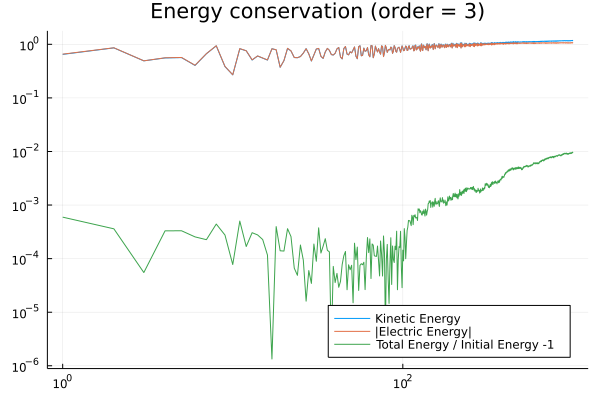

In [23]:
plot(abs.(Energy_K[2:end] .- Energy_K[1]), title = "Energy conservation (order = $(order))", label = "Kinetic Energy"
#, legend = :outertopright
, legend = :bottomright)
plot!(abs.(Energy_E[2:end] .- Energy_E[1]), label = "|Electric Energy|")
plot!(abs.(Energy_K[2:end]  + Energy_E[2:end] .- (Energy_K[1]+Energy_E[1])) ./ (Energy_K[1]+Energy_E[1]) , yscale=:log10, xscale=:log10, label = "Total Energy / Initial Energy -1 ")
#png(run_name * "energy_conservation")

In [17]:
abs.(Energy_K[end]  + Energy_E[end] .- (Energy_K[1]+Energy_E[1])) ./ (Energy_K[1]+Energy_E[1])

0.00942402005877409

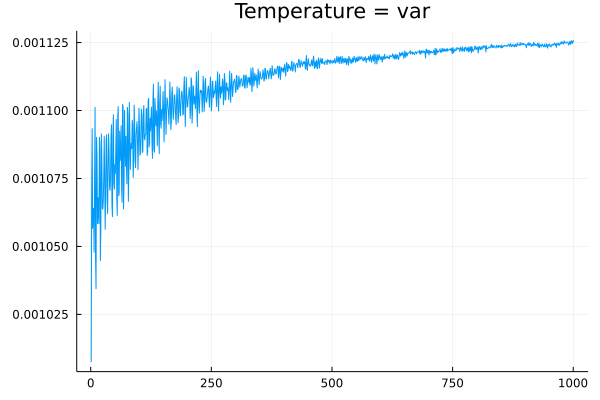

In [19]:
plot(T, label= "θ", title = "Temperature = var", legend = false)
#png(run_name * "temperature")

In [20]:
T[end]

0.0011252743893311913

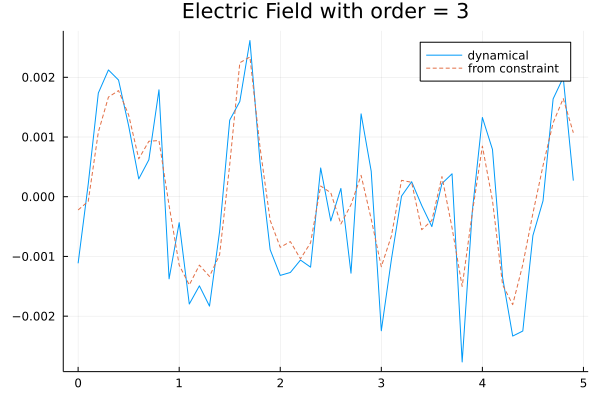

In [22]:
E_F = zeros(J)
ϕ_F = zeros(J)
#n_F = zeros(J)
#get_density!(u, n_F, p)
n0 = N/L
get_ϕ!(ϕ_F, n_F/n0 .+ 1, κ)
#get_ϕ!(ϕ_F, n_F .- n0, κ)
get_E_from_ϕ!(ϕ_F,E_F,dx)
plot(x,E_f, label = "dynamical", title="Electric Field with order = $(order)")
plot!(x,E_F,label="from constraint", ls=:dash)
#t_f = 40
#png(run_name * "E")

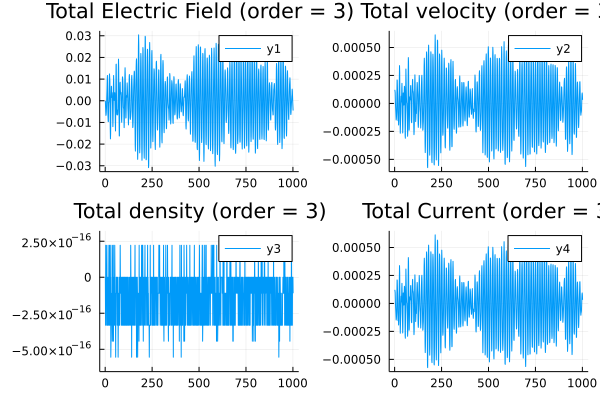

In [27]:
plot(layout=(2,2), title="order = $(order)")
plot!(subplot=1,E_T,title="Total Electric Field (order = $(order))")
plot!(subplot=2,v_T./N, title="Total velocity (order = $(order))")
plot!(subplot=3,D_T,title = "Total density (order = $(order))")
plot!(subplot=4,S_T,title = "Total Current (order = $(order))")
#png(run_name * "totals")

In [12]:
T_T5_O5 = load("Results/" * "long_t100000_L5_N2_5_J50_M1000001_o5_T5" * "results.jld2", "T");
T_T4_O5 = load("Results/" * "long_t100000_L5_N2_5_J50_M1000001_o5_T4" * "results.jld2", "T");
T_T3_O5 = load("Results/" * "long_t100000_L5_N2_5_J50_M1000001_o5_T3" * "results.jld2", "T");
T_T5_O3 = load("Results/" * "long_t100000_L5_N2_5_J50_M1000001_o3_T5" * "results.jld2", "T");
T_T4_O3 = load("Results/" * "long_t100000_L5_N2_5_J50_M1000001_o3_T4" * "results.jld2", "T");
T_T3_O3 = load("Results/" * "long_t100000_L5_N2_5_J50_M1000001_o3_T3" * "results.jld2", "T");
#T_T1_O3 = load("Results/" * "long_t100000_L5_N2_5_J50_M1000001_o3_T1" * "results.jld2", "T");


In [18]:

plot(T_T3_O5, yscale=:log10
, title = "Temperature Evolution with different particle types"
, label="order 5 T 3")
plot!(T_T4_O5, label="order 5 T 4")
plot!(T_T5_O5, label="order 5 T 5")
#scatter!(T_T1_O3, label="order 3 T 1")
plot!(T_T3_O3, label="order 3 T 3")
plot!(T_T4_O3, label="order 3 T 4")
plot!(T_T5_O3, label="order 3 T 5")

png("long_L5N2_5_J50")

In [29]:
(E_E_T5_O5, E_K_T5_O5) = load("Results/" * "long_t100000_L5_N2_5_J50_M1000001_o5_T5" * "results.jld2", "Energy_E", "Energy_K");
(E_E_T4_O5, E_K_T4_O5) = load("Results/" * "long_t100000_L5_N2_5_J50_M1000001_o5_T4" * "results.jld2", "Energy_E", "Energy_K");
(E_E_T3_O5, E_K_T3_O5) = load("Results/" * "long_t100000_L5_N2_5_J50_M1000001_o5_T3" * "results.jld2", "Energy_E", "Energy_K");
(E_E_T5_O3, E_K_T5_O3) = load("Results/" * "long_t100000_L5_N2_5_J50_M1000001_o3_T5" * "results.jld2", "Energy_E", "Energy_K");
(E_E_T4_O3, E_K_T4_O3) = load("Results/" * "long_t100000_L5_N2_5_J50_M1000001_o3_T4" * "results.jld2", "Energy_E", "Energy_K");
(E_E_T3_O3, E_K_T3_O3) = load("Results/" * "long_t100000_L5_N2_5_J50_M1000001_o3_T3" * "results.jld2", "Energy_E", "Energy_K");

In [43]:
plot(abs.(E_K_T5_O5[2:end] .- E_K_T5_O5[1]), title = "Energy conservation (order = 5)", label = "Kinetic Energy"
#, legend = :outertopright
, legend = :bottomright)
plot!(abs.(E_E_T5_O5[2:end] .- E_E_T5_O5[1]), label = "|Electric Energy|")
plot!(abs.(E_K_T5_O5[2:end]  + E_E_T5_O5[2:end] .- (E_K_T5_O5[1]+E_E_T5_O5[1])) ./ (E_K_T5_O5[1]+E_E_T5_O5[1]) , yscale=:log10, xscale=:log10, label = "Total Energy / Initial Energy -1 ")
#png("long_energies O5")

In [44]:
plot(abs.(E_K_T5_O3[2:end] .- E_K_T5_O3[1]), title = "Energy conservation (order = 3)", label = "Kinetic Energy"
#, legend = :outertopright
, legend = :bottomright)
plot!(abs.(E_E_T5_O3[2:end] .- E_E_T5_O3[1]), label = "|Electric Energy|")
plot!(abs.(E_K_T5_O3[2:end]  + E_E_T5_O3[2:end] .- (E_K_T5_O3[1]+E_E_T5_O3[1])) ./ (E_K_T5_O3[1]+E_E_T5_O3[1]) , yscale=:log10, xscale=:log10, label = "Total Energy / Initial Energy -1 ")
#png("long_energies O3")

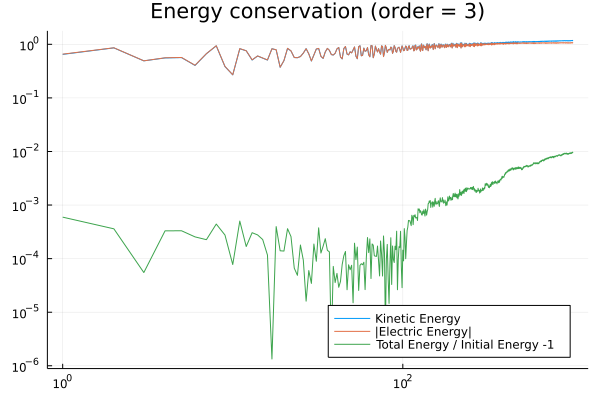

In [30]:
plot(abs.(E_K_T4_O3[2:end] .- E_K_T4_O3[1]), title = "Energy conservation (order = 3)", label = "Kinetic Energy"
#, legend = :outertopright
, legend = :bottomright)
plot!(abs.(E_E_T4_O3[2:end] .- E_E_T4_O3[1]), label = "|Electric Energy|")
plot!(abs.(E_K_T4_O3[2:end]  + E_E_T4_O3[2:end] .- (E_K_T4_O3[1]+E_E_T4_O3[1])) ./ (E_K_T4_O3[1]+E_E_T4_O3[1]) , yscale=:log10, xscale=:log10, label = "Total Energy / Initial Energy -1 ")
#png(run_name * "energy_conservation")

In [42]:
plot(abs.(E_K_T5_O5[2:end]  + E_E_T5_O5[2:end] .- (E_K_T5_O5[1]+E_E_T5_O5[1])) ./ (E_K_T5_O5[1]+E_E_T5_O5[1]) , yscale=:log10, xscale=:log10, label = "order 5", title = "Energy conservation T5" 
#, legend = :outertopright
, legend = :bottomright)
plot!(abs.(E_K_T5_O3[2:end]  + E_E_T5_O3[2:end] .- (E_K_T5_O3[1]+E_E_T5_O3[1])) ./ (E_K_T5_O3[1]+E_E_T5_O3[1]) , label = "order 3")
#png("long_energy_conservation_T5")

In [39]:
plot(abs.(E_K_T4_O5[2:end]  + E_E_T4_O5[2:end] .- (E_K_T4_O5[1]+E_E_T4_O5[1])) ./ (E_K_T4_O5[1]+E_E_T4_O5[1]) , yscale=:log10, xscale=:log10, label = "order 5", title = "Energy conservation T4" 
#, legend = :outertopright
, legend = :bottomright)
plot!(abs.(E_K_T4_O3[2:end]  + E_E_T4_O3[2:end] .- (E_K_T4_O3[1]+E_E_T4_O3[1])) ./ (E_K_T4_O3[1]+E_E_T4_O3[1]) , label = "order 3")
#png("long_energy_conservation_T4")